Univariate Groundwater Time Series Analysis and Forecasting with Python

 About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Ground Water Data.</p>

In [2]:
# read the excel file
furniture = pd.read_excel("Budi_data3_sumur_5.xls")
furniture.head()

,Row ID,Order ID,Measurement Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,GWE,Quantity,Discount,Profit
0,1,0,2005-01-01,2005-01-01,Standard Class,0,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2726.015,1,1,1
1,2,0,2005-02-01,2005-02-01,Standard Class,1,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2726.280,1,1,1
2,3,0,2005-03-01,2005-03-01,Standard Class,2,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2726.545,1,1,1
3,4,0,2005-04-01,2005-04-01,Standard Class,3,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2726.810,1,1,1
4,5,0,2005-05-01,2005-05-01,Standard Class,4,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2727.075,1,1,1


In [3]:
furniture.describe()

,Row ID,Order ID,Customer ID,Postal Code,GWE,Quantity,Discount,Profit
count,144.000000,144.0,144.000000,144.000000,144.000000,144.0,144.0,144.0
mean,72.500000,0.0,71.500000,92309.083333,2736.315531,1.0,1.0,1.0
std,41.713307,0.0,41.713307,5.467642,8.944320,0.0,0.0,0.0
min,1.000000,0.0,0.000000,92307.000000,2698.750000,1.0,1.0,1.0
25%,36.750000,0.0,35.750000,92307.000000,2729.962643,1.0,1.0,1.0
50%,72.500000,0.0,71.500000,92307.000000,2738.875000,1.0,1.0,1.0
75%,108.250000,0.0,107.250000,92307.000000,2742.376250,1.0,1.0,1.0
max,144.000000,0.0,143.000000,92331.000000,2751.750000,1.0,1.0,1.0


## Data Preprocessing

In [4]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Measurement Date,GWE
0,2005-01-01,2726.015
1,2005-02-01,2726.280
2,2005-03-01,2726.545
3,2005-04-01,2726.810
4,2005-05-01,2727.075


In [5]:
# Sort the Order Date 
furniture = furniture.sort_values('Measurement Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

  Measurement Date       GWE
0       2005-01-01  2726.015


Measurement Date    0
GWE                 0
dtype: int64

In [6]:
# grouping sales according to Order Date
furniture.groupby('Measurement Date')['GWE'].sum().reset_index()

# min and max values of Order Date
print(furniture['Measurement Date'].min())
print(furniture['Measurement Date'].max())

2005-01-01 00:00:00
2016-12-01 00:00:00


In [7]:
#set 'Order Date' as index
furniture = furniture.set_index('Measurement Date')
furniture.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Measurement Date', length=144, freq=None)

In [8]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['GWE'].resample('MS').mean()
y['2017':]

Series([], Freq: MS, Name: GWE, dtype: float64)

## Data Visualization

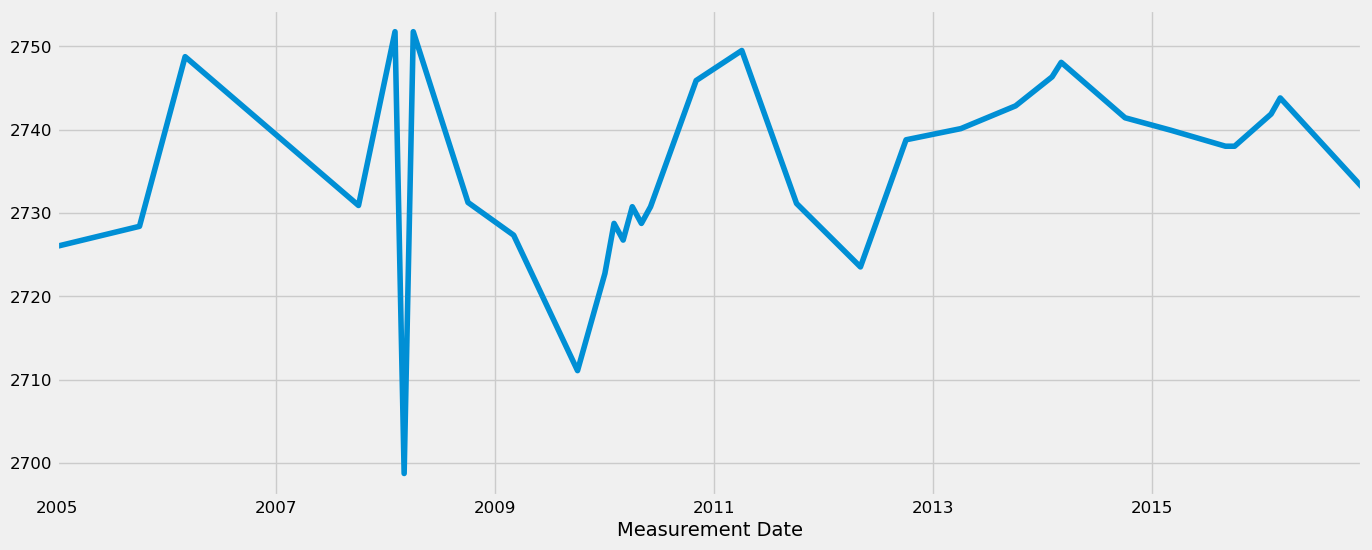

In [9]:
y.plot(figsize = (15, 6))
plt.show()

# Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


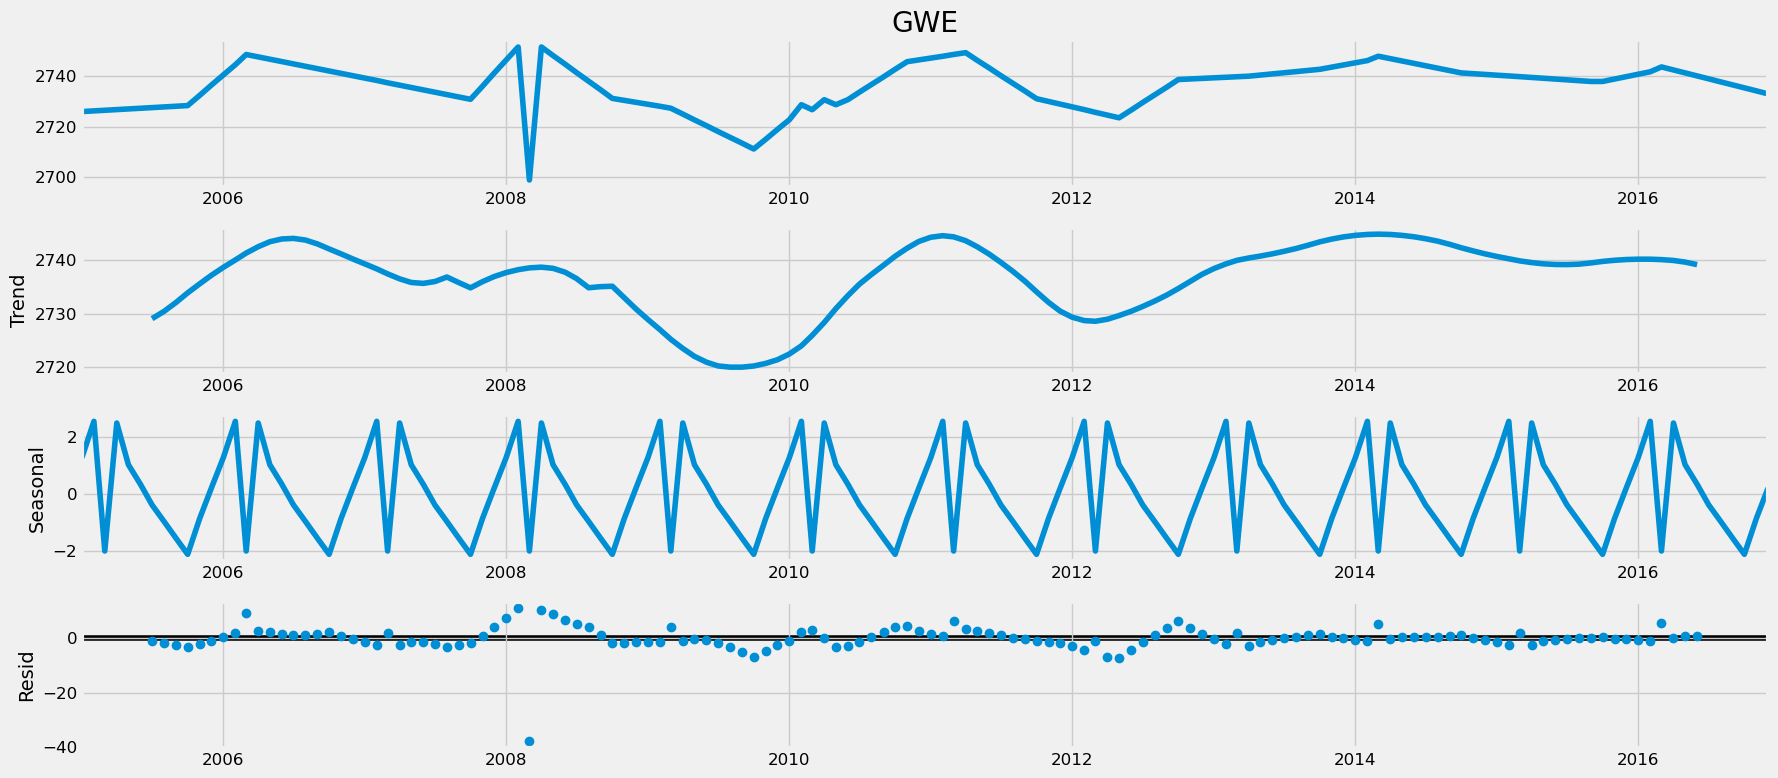

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [11]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2689.9936935930964
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2533.706956440715
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1072.4075398108419
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:995.0177335718397


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1352.600971714667
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1026.1699069747215
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:995.0862489808331
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2588.1940669502537
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2340.9447000160408
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1019.80630906246
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:943.9304401477834


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1270.7247666773253


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1315.0264270733035
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:976.3938918547376
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:944.8499349789713
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:947.8046840213278
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:949.7078895589896
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:973.6470974645515
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:900.430644214468
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:949.7000061609317
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:951.6047806915542
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:935.3033932506959
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:902.1808881471663
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:914.3044820275453
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:914.9726909085916
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:949.0090472564848
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:870.7400801880067
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:914.8566365655759
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:916.7393625004304
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:906.4031842003653
ARIMA(0, 1

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\li

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:971.9021731176763
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:965.7387856054986
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:891.8324684558656
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:970.3610847274183


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:978.6655733379653
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:926.6780642644892
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:893.4501102606112
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:977.6625195745871


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:943.5189286857862
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:952.3783833269058
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:873.9681652676477
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:935.517592092526


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-pack

ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:953.6528327017309
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:910.4664376993994
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:874.499310362789
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:916.8871589168324
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:918.362215909149
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:948.7489473477026
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:873.2567959615138
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:918.3394875796383
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:920.2994943574768
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:909.6105299444405
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:874.6393954812675
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:914.2608571563511
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:915.0638080541578
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:948.6272546469256
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:870.9720691137803
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:914.9811254307419
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:916.9031961657032
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:907.0558374974357
ARIMA(1, 1, 

###### Fitting the ARIMA model

In [13]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.119     -1.491      0.136      -0.410       0.056
ma.L1         -0.3427      0.142     -2.411      0.016      -0.621      -0.064
ar.S.L12      -0.5202      0.033    -15.863      0.000      -0.585      -0.456
sigma2        54.2743      2.867     18.930      0.000      48.655      59.894


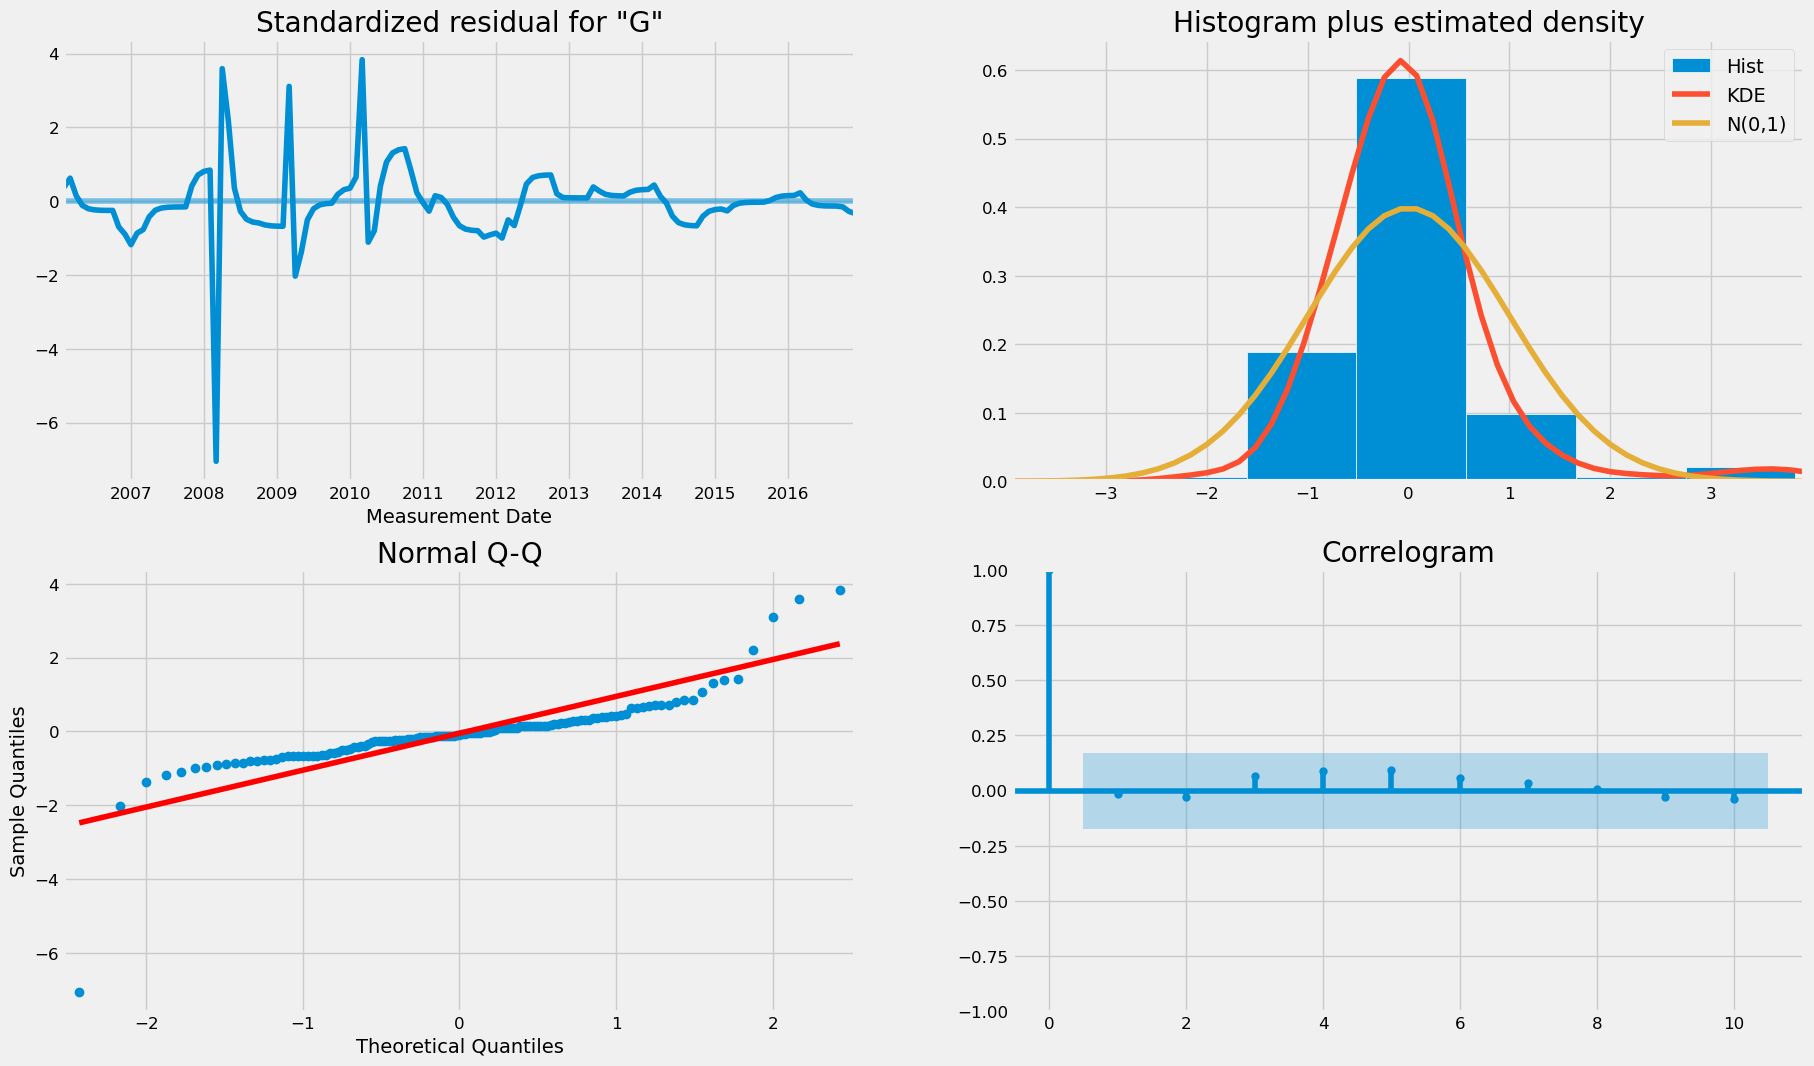

In [14]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (20, 12))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted GWE to real GWE of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2012-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower GWE,upper GWE
Measurement Date,,
2012-01-01,2719.807602,2748.686144
2012-02-01,2719.700554,2748.579096
2012-03-01,2714.982183,2743.860724
2012-04-01,2715.034607,2743.913148
2012-05-01,2709.957014,2738.835555
2012-06-01,2708.709012,2737.587553
2012-07-01,2710.456663,2739.335204
2012-08-01,2713.155184,2742.033725
2012-09-01,2716.084747,2744.963288


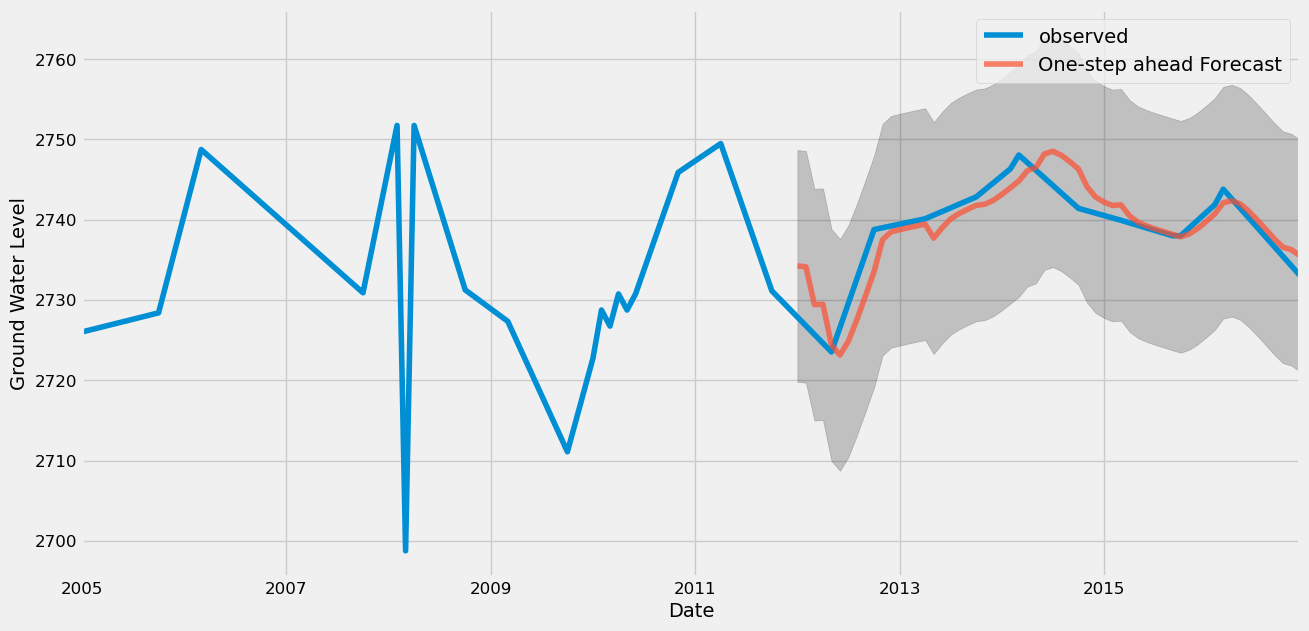

In [16]:
#Visualize the forecasting
ax = y['2005':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Ground Water Level')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [17]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2007-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))


The Mean Squared Error of our forecasts is 7.3712
The Root Mean Squared Error of our forecasts is 2.715


##### Producing and visualizing forecasts

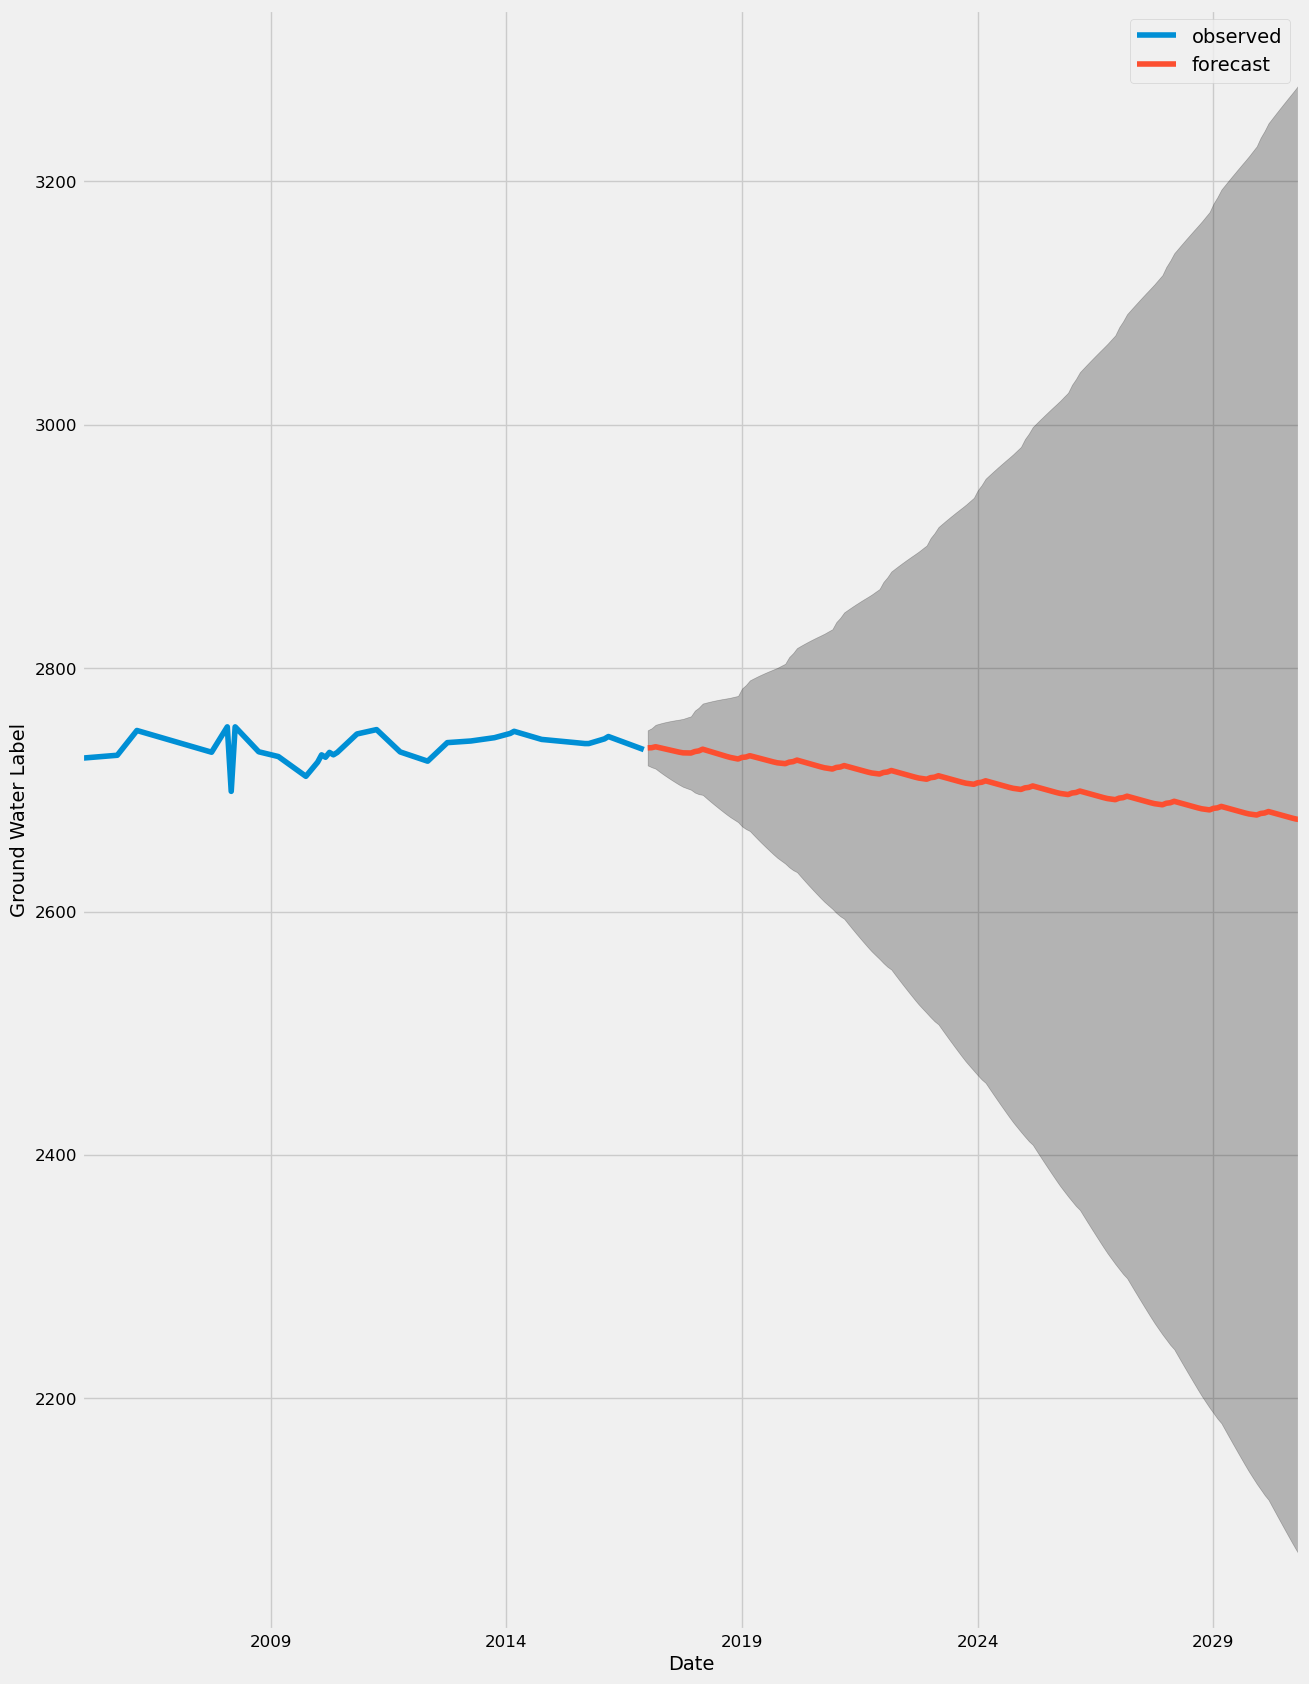

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 167)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 20))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ground Water Label')

plt.legend()
plt.show()


## Summary

<ul>
<li>Our model clearly captured Ground Water seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [19]:
pred_uc.predicted_mean['2030'].describe()

count      11.000000
mean     2679.027160
std         2.261451
min      2675.541659
25%      2677.227946
50%      2679.463400
75%      2680.757044
max      2682.149432
Name: predicted_mean, dtype: float64

In [20]:
df = pd.DataFrame(pred_uc.predicted_mean['2030'])
display(df)

,predicted_mean
2030-01-01,2680.555174
2030-02-01,2680.958913
2030-03-01,2682.149432
2030-04-01,2681.251188
2030-05-01,2680.357717
2030-06-01,2679.463400
2030-07-01,2678.569233
2030-08-01,2677.675040
2030-09-01,2676.780851
2030-10-01,2675.996157


In [21]:
aax_new = pred_ci.DataFrame()
display(aax_new)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'